# preprocessing & cleaning
## -----------------------------------------

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
df=pd.read_csv('combine_swiggy.csv',encoding='latin1')

In [39]:
df.head()

,Unnamed: 0,restaurant_name,ratings,cuisines,pricing,address,distance,city
0,0,KFC,4.4,"Burgers, Fast Food, Rolls & Wraps",40% OFF UPTO ?80,Vallabh Vidyanagar,4.435-40 mins,anand
1,1,KFC,4.4,"Burgers, Fast Food, Rolls & Wraps",40% OFF UPTO ?80,Vallabh Vidyanagar,4.435-40 mins,anand
2,2,Pizza Hut,4.3,Pizzas,ITEMS AT ?189,Hadgood,4.340-45 mins,anand
3,3,Pizza Hut,4.3,Pizzas,ITEMS AT ?189,Hadgood,4.340-45 mins,anand
4,4,Subway,4.4,"Healthy Food, Salads, Fast Food",NaN,mahadev-nagar,4.430-35 mins,anand


# messy data ( unstructed data)
 1] split the distance and ratings then remove ratings(also mins)
    
 2] drop the unnamed:0
    
    
# dirty data (low quality data)

  1] remove extra space in ratings 
    
  2] clean the pricing columns while removing the offer

  3] drop duplicates rows
    
  4] fill up the ratings and price 

  5] convert each categorical columns in the lower
  
  6] convert ratings , price , distance in numeric formet
  
  


In [40]:
df_c=df.copy()

In [41]:
df_c.shape

(4216, 8)

In [42]:
#df_c.drop(columns='Unnamed: 0',inplace=True)
# drop the unnamed:0

In [43]:
df_c['distance']=df_c['distance'].replace(to_replace=['\x95','mins'],value=[',',''],regex=True)


In [44]:
df_c['distance']=df_c['distance'].str.split(',',expand=True)[1]


In [47]:
df_c[['pricing']].sample(5)

,pricing
3877,NaN
3716,NaN
2658,NaN
3115,?150 OFF ABOVE ?349
2865,NaN


In [29]:
#remove extra space in ratings
df_c['ratings']=df_c['ratings'].str.replace('\x95',' ')

In [11]:
#clean the pricing columns while removing the offer
df_c['pricing']=df_c['pricing'].apply(
    lambda x: np.nan if isinstance(x, str) and 'OFF ABOVE' in x and any(char.isdigit() for char in x) else x
)



In [12]:
df_c['pricing']=df_c['pricing'].str.split('?',expand=True)[1]

In [13]:
df_c['pricing'].sample(9)

1103    NaN
3609    NaN
513     150
352      80
1872    NaN
2020    NaN
3989    NaN
4069    NaN
1827    120
Name: pricing, dtype: object

In [14]:
# drop duplicates
#df_c.duplicated().sum()

0

In [15]:
#df_c.drop_duplicates(inplace=True)

In [16]:
#df_c.shape

In [17]:
# lower case in cuisines 
df_c['cuisines']=df_c['cuisines'].str.lower()


In [18]:
# address in lower case
df_c['address']=df_c['address'].str.lower()

In [19]:
df_c['restaurant_name']=df_c['restaurant_name'].str.lower()

In [20]:
df_c[df_c['city']=='mehsana']['address'].value_counts()
# here still one problem there is differ names are located where logic is same 
# example there are some values like [mehsana city, mehsana locality, mehsana ,mahesana,radhanpur road opp d mart,radhanpur road ]


address
mehsana city                   43
mehsana locality               16
radhanpur road                  8
nagalpur                        5
kunal                           4
radhakrishna township           2
shraddhadip society             2
suramya park society            2
mehsana                         2
mahesana                        1
jagannath mandir rd             1
geb visnagar road               1
radhanpur road opp d mart       1
surdhara society                1
tirupati shahibaug township     1
bansari township                1
Name: count, dtype: int64

In [21]:
name_trans = ['mehsana city', 'mehsana locality', 'mahesana']
name_trans2 = ['radhanpur road opp d mart']

# Function to replace address based on city
def replace_address(df_c, city):
    # Filter rows based on the specified city
    mask = df_c['city'] == city
    
    # Apply the replacement logic
    def replace_logic(x):
        # Check if any term from name_trans or name_trans2 is in the address
        if any(term in x.lower() for term in name_trans) or any(term in x.lower() for term in name_trans2):
            return 'mehsana'
        else:
            return x
    
    # Apply the logic to the 'address' column for the filtered rows
    df_c.loc[mask, 'address'] = df_c.loc[mask, 'address'].apply(replace_logic)
    
    return df_c

In [22]:
df_c=replace_address(df_c, city='mehsana')


In [23]:
df_c[df_c['city']=='mehsana']['address'].value_counts()

address
mehsana                        63
radhanpur road                  8
nagalpur                        5
kunal                           4
radhakrishna township           2
shraddhadip society             2
suramya park society            2
jagannath mandir rd             1
geb visnagar road               1
surdhara society                1
tirupati shahibaug township     1
bansari township                1
Name: count, dtype: int64

In [24]:
df_c[df_c['city']=='gandhinagar']['address'].unique()

array(['gandhinagar', 'reliance cross road', 'sector 11', 'orbit mall',
       'gandhinagar rk', 'infocity', 'pramukh cyprus', 'sector 16',
       'airport gandhinagar highway', 'kudasan', 'sargasan', 'kudason',
       'near aashka multispeciality hospital',
       'near aashka hospital sargasan', 'sector 12b', 'giftcity',
       'pramukh mast ananr reliance croos kudasan', 'ahm_gandhinagar',
       'radhe square', 'dholakuwa opp pramukh arcade',
       'william johnâ\x80\x99s pizza', 'kudasan, gandhinagar', 'adalaj',
       'sector 30', 'papakipari', 'business park,rayson', 'thaltej',
       'alfa one mall', 'sky forest bulding', 'sky forest', 'navrangpura',
       'avlon hotel', 'gota', 'vastrapur', 'gurukul', 'bodakdev',
       'ahmedabad', 'satellite', 'bapunagar', 'ellis bridge',
       'nikol torrent power', 'ashram road', 'sola', 'chandkheda',
       'ambawadi', 'ghatlodia', 'naroda', 'kubernagar', 'memnagar',
       'new science city road,', 'dariapur', 'shahibag', 'maninagar',

In [25]:
name_trans_g = ['ahm_gandhinagar', 'ahmedabad','ahemdabad']

# Function to replace address based on city
def replace_address(df_c, city):
    # Filter rows based on the specified city
    mask = df_c['city'] == city
    
    # Apply the replacement logic
    df_c.loc[mask, 'address'] = df_c.loc[mask, 'address'].apply(
        lambda x: 'gandhinagar' if x.lower() in name_trans_g else x)
    
    return df_c

In [26]:
df_c=replace_address(df_c,city='gandhinagar')

In [27]:
df_c[(df_c['city']=='gandhinagar') & (df_c['address']=='ahmedabad')]

,Unnamed: 0,restaurant_name,ratings,cuisines,pricing,address,distance,city


In [28]:
df_c[df_c['city']=='vadodara']['address'].value_counts()

address
akota                  102
mandvi                  81
fatehgunj               71
manjalpur               56
alkapuri                39
                      ... 
vasna road,vadodara      1
karelibaugh              1
babajipura               1
racecourse road          1
shubhanpura              1
Name: count, Length: 86, dtype: int64

In [29]:
df_c.loc[df_c['city'] == 'anand', 'address'] = df_c.loc[df_c['city'] == 'anand', 'address'].replace(to_replace=['mahadev-nagar', 'mahadevnagar'], value='mahadev nagar')

df_c[df_c['city'] == 'anand']['address'] .value_counts()

address
mahadev nagar                      76
vallabh vidyanagar                 72
gamdi                               9
gidc                                4
rajodpura                           4
karamsad                            3
hadgood                             3
neelkanth nagar                     3
amul dairy road                     3
jitodia                             3
vivekanand wadi                     3
anand sojitra road                  2
new bus stand                       2
sojitra road                        2
bakrol                              2
shah heights                        2
maruti solaris annex                2
triveni arcade                      2
tukki gali                          1
townhall                            1
maruti solaris annex, anand         1
new vidyanagar                      1
100ft road                          1
nanikhodiyar                        1
municipal hospital                  1
popati nagar                        1
mota

In [30]:
df_c[df_c['city']=='nadiyad']['address'].value_counts()
#'nadiad city ,nadiad , nadiad locality '
#name_trans=['nadiad city' ,'nadiad' , 'nadiad locality']
#name_trans

address
nadiad city         42
college road        13
shanti nagar        10
pij road             9
vaniyavad circle     8
nadiad locality      7
nadiad               6
pij crossing         4
petlad road          3
bus stand            3
nagarpalika road     2
kamda crossing       2
santram market       2
uttarsanda road      1
nadiad pij road      1
amdavadi bazar       1
Name: count, dtype: int64

In [31]:
name_trans_n=['nadiad city' ,'nadiad' , 'nadiad locality']

# Function to replace address based on city
def replace_address(df_c, city):
    # Filter rows based on the specified city
    mask = df_c['city'] == city
    
    # Apply the replacement logic
    df_c.loc[mask, 'address'] = df_c.loc[mask, 'address'].apply(
        lambda x: 'nadiyad' if x.lower() in name_trans_n else x)
    
    return df_c



In [32]:
df_c=replace_address(df_c,city='nadiyad')

In [33]:
df_c[df_c['city']=='nadiyad']['address'].value_counts()

address
nadiyad             55
college road        13
shanti nagar        10
pij road             9
vaniyavad circle     8
pij crossing         4
petlad road          3
bus stand            3
nagarpalika road     2
kamda crossing       2
santram market       2
uttarsanda road      1
nadiad pij road      1
amdavadi bazar       1
Name: count, dtype: int64

In [34]:
df_c[df_c['city']=='mehsana']['address'].value_counts()

address
mehsana                        63
radhanpur road                  8
nagalpur                        5
kunal                           4
radhakrishna township           2
shraddhadip society             2
suramya park society            2
jagannath mandir rd             1
geb visnagar road               1
surdhara society                1
tirupati shahibaug township     1
bansari township                1
Name: count, dtype: int64

In [35]:
df_c['city'].value_counts()

city
ahmedabad      1577
gandhinagar    1554
vadodara        660
anand           220
nadiyad         114
mehsana          91
Name: count, dtype: int64

In [36]:
df_c.drop(columns='Unnamed: 0',inplace=True)

In [37]:
df_c.duplicated().sum()

66

In [38]:
df_c.drop_duplicates(inplace=True)

In [39]:
df_c.shape

(4150, 7)

In [35]:
df_c

,Unnamed: 0,restaurant_name,ratings,cuisines,pricing,address,distance,city
0,0,KFC,4.4,"Burgers, Fast Food, Rolls & Wraps",40% OFF UPTO ?80,Vallabh Vidyanagar,35-40,anand
1,1,KFC,4.4,"Burgers, Fast Food, Rolls & Wraps",40% OFF UPTO ?80,Vallabh Vidyanagar,35-40,anand
2,2,Pizza Hut,4.3,Pizzas,ITEMS AT ?189,Hadgood,40-45,anand
3,3,Pizza Hut,4.3,Pizzas,ITEMS AT ?189,Hadgood,40-45,anand
4,4,Subway,4.4,"Healthy Food, Salads, Fast Food",NaN,mahadev-nagar,30-35,anand
...,...,...,...,...,...,...,...,...
4211,4211,Ganga Gayatri Samosa,4.3,"Fast Food, Street Food, Snacks",10% OFF UPTO ?40,Bus Stand,35-40,nadiyad
4212,4212,Bombay Chopati Bhelpuri Center,4.4,"Chaat, Snacks",10% OFF UPTO ?40,Nadiad City,35-40,nadiyad
4213,4213,JANTA PAUBHAJI PULAV ICE CREAM CENTER,NaN,Indian,NaN,Nadiad City,None,nadiyad
4214,4214,Bao Box,NaN,"Chinese, Indian, Asian",?75 OFF ABOVE ?399,Nadiad City,None,nadiyad


In [41]:
# ditance into average time

def convert_distance(distance_str):
    if isinstance(distance_str, str):  # Check if the value is a string
        min_time, max_time = map(int, distance_str.split('-'))
        return round((min_time + max_time) / 2)
    else:
        return np.nan  # Handle non-string values, e.g., NaN


In [42]:
df_c['distance'] = df_c['distance'].apply(convert_distance)

In [43]:
df_c

,restaurant_name,ratings,cuisines,pricing,address,distance,city
0,kfc,4.4,"burgers, fast food, rolls & wraps",80,vallabh vidyanagar,38.0,anand
2,pizza hut,4.3,pizzas,189,hadgood,42.0,anand
4,subway,4.4,"healthy food, salads, fast food",NaN,mahadev nagar,32.0,anand
6,mcdonald's,4.4,"burgers, beverages, cafe, desserts",179,vallabh vidyanagar,32.0,anand
8,the belgian waffle co.,4.6,"waffle, desserts, ice cream, beverages",NaN,triveni arcade,38.0,anand
...,...,...,...,...,...,...,...
4211,ganga gayatri samosa,4.3,"fast food, street food, snacks",40,bus stand,38.0,nadiyad
4212,bombay chopati bhelpuri center,4.4,"chaat, snacks",40,nadiyad,38.0,nadiyad
4213,janta paubhaji pulav ice cream center,NaN,indian,NaN,nadiyad,NaN,nadiyad
4214,bao box,NaN,"chinese, indian, asian",NaN,nadiyad,NaN,nadiyad


In [44]:
#df_c.to_excel("C:\\Users\\Dell\\OneDrive\\Desktop\\missing_swiggy.xlsx")

In [45]:
df_c['distance'].sample(6)

2983    68.0
3406    78.0
2348     NaN
1374    48.0
691     42.0
3252    68.0
Name: distance, dtype: float64

In [46]:
df_c.isnull().mean()*100

restaurant_name     0.000000
ratings            18.024096
cuisines            0.000000
pricing            71.397590
address             0.000000
distance           18.024096
city                0.000000
dtype: float64

In [47]:
# here we need to fill up the missing values of the ['ratings','pricing','distance']
# they will not fill up by using the mean,median, or mode type because they are having the ratio of >5% which is big and may affect over model predication

In [48]:
df_c['ratings']=df_c['ratings'].astype('float')
df_c['pricing']=df_c['pricing'].astype('float')
df_c['distance']=df_c['distance'].astype('float')

In [49]:
df_c[df_c['city']=='ahmedabad'][['ratings','pricing','distance','city']].sample(6)

,ratings,pricing,distance,city
2430,4.3,NaN,38.0,ahmedabad
1746,4.6,150.0,52.0,ahmedabad
2377,5.0,NaN,42.0,ahmedabad
2313,2.0,45.0,48.0,ahmedabad
2001,3.6,NaN,38.0,ahmedabad
1544,4.1,120.0,38.0,ahmedabad


In [50]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4150 entries, 0 to 4215
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   restaurant_name  4150 non-null   object 
 1   ratings          3402 non-null   float64
 2   cuisines         4150 non-null   object 
 3   pricing          1187 non-null   float64
 4   address          4150 non-null   object 
 5   distance         3402 non-null   float64
 6   city             4150 non-null   object 
dtypes: float64(3), object(4)
memory usage: 259.4+ KB


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


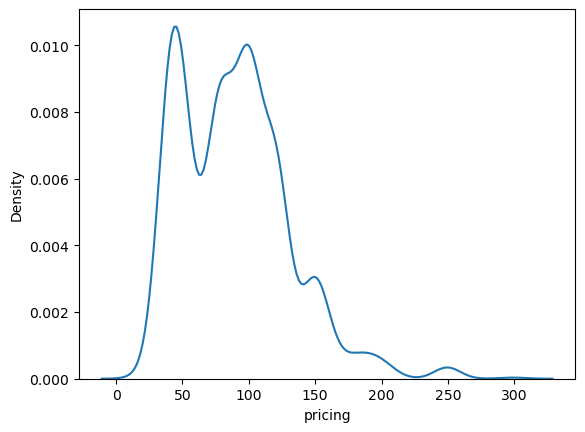

In [51]:
sns.kdeplot(df_c['pricing'])
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


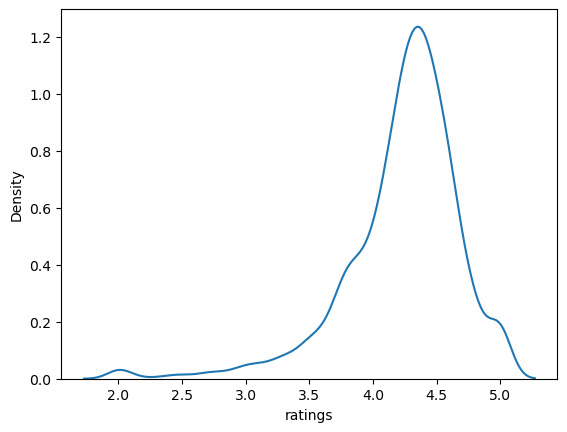

In [52]:
sns.kdeplot(df_c['ratings'])
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


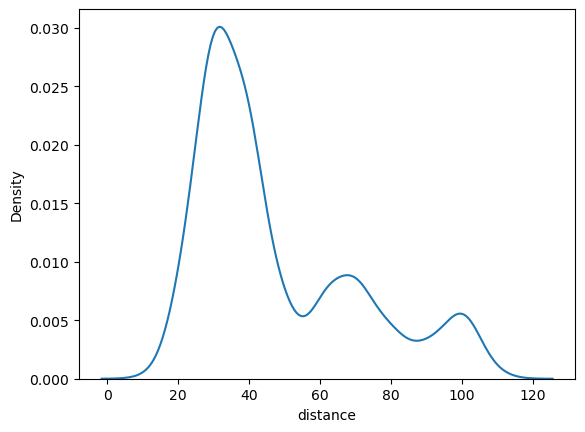

In [53]:
sns.kdeplot(df_c['distance'])
plt.show()

[note] : Given that your dataset contains multiple cities, and you need to calculate weighted similarities that depend on accurate ratings, pricing, and distance, KNN imputation per city is likely the best approach. It will help maintain the integrity of city-specific patterns, ensuring more reliable recommendations